# Assignment

## Question 1


1. Linear Regression Exercise:
   Using the California Housing dataset from scikit-learn, create a linear regression model to predict house prices.
   Evaluate the performance of Linear Regression on test set.

   ```python
   from sklearn.datasets import fetch_california_housing

   # Load dataset
   housing = fetch_california_housing()
   ```


In [2]:
# Question 1: Linear Regression Exercise
# Using the California Housing dataset to predict house prices

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
housing = fetch_california_housing()

# Create DataFrame for better understanding
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Display basic information about the dataset
print("Dataset shape:", X.shape)
print("\nFeatures summary:")
print(X.describe())

print("\nTarget variable summary:")
print(pd.Series(y, name='house_prices').describe())

# Check for missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {pd.isnull(y).sum()}")



Dataset shape: (20640, 8)

Features summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.35


Training set size: 16512 samples
Test set size: 4128 samples

MODEL PERFORMANCE EVALUATION:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758

Model Intercept: 2.0719

Feature Coefficients (after scaling):
Latitude       :  -0.8969
Longitude      :  -0.8698
MedInc         :   0.8544
AveBedrms      :   0.3393
AveRooms       :  -0.2944
HouseAge       :   0.1225
AveOccup       :  -0.0408
Population     :  -0.0023


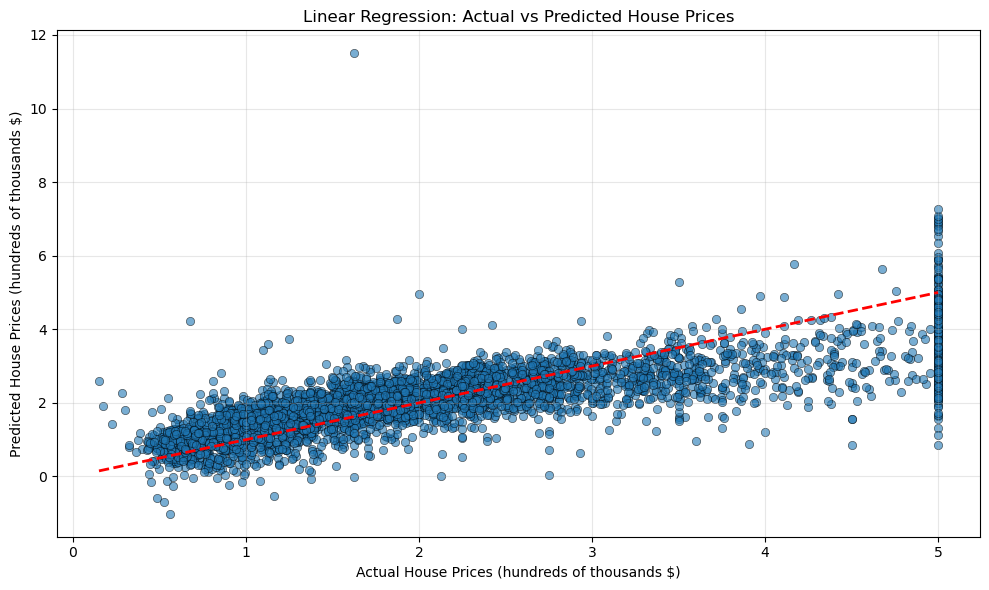

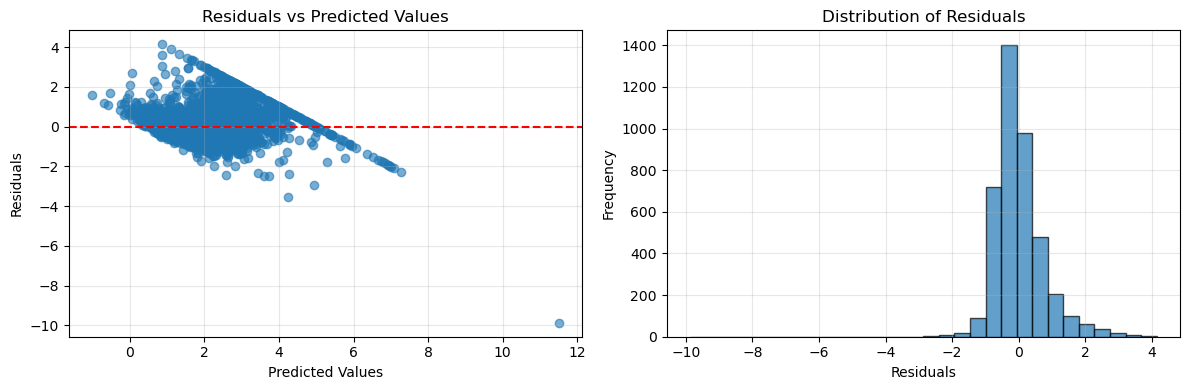

In [3]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale the features (recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMODEL PERFORMANCE EVALUATION:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Display model intercept (average house price when all features are 0, i.e. all features = their average values because features are scaled)
print(f"\nModel Intercept: {model.intercept_:.4f}")

# Display model coefficients (feature importance)
print("\nFeature Coefficients (after scaling):")
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in feature_importance.iterrows():
    print(f"{row['Feature']:<15}: {row['Coefficient']:>8.4f}") # <15: Left-align feature name in 15-character width, >8.4f: Right-align coefficient in 8 characters with 4 decimal places

# Visualization: Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Prices (hundreds of thousands $)')
plt.ylabel('Predicted House Prices (hundreds of thousands $)')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual analysis (checking model assumptions)
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

# Residuals vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True, alpha=0.3)

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Model Insights

Most important features (by absolute coefficient value):
1. Latitude: -0.8969
2. Longitude: -0.8698
3. MedInc: 0.8544

Model Intercept: 2.0719
Interpretation: Since all features were scaled, all features = 0 means all features = their average values. Value of 2.0719 means hen a house has average median income, average house age, average number of rooms, average location, etc., the model predicts the house price will be $207,190.

Model Performance Summary:
- The model explains 57.6% of the variance in house prices (R² Score: 0.5758)
- Average prediction error: ±0.746 (hundreds of thousands $) (RMSE: 0.7456)
- This translates to about ±$74558 in actual dollars

Residual Analysis:
- Residuals vs Predicted Values:
    Scatterplot:
    - Clear downward trend/pattern in the residuals as predicted values increase
    - Residuals start around +4 for low predictions and go down to about -10 for high predictions
    - Funnel shape - residuals spread out more for higher predicted values
    - Linearity assumption violated: The clear pattern suggests our linear model is missing some non-linear relationship
    - Homoscedasticity assumption violated: The funnel shape shows heteroscedasticity (non-constant variance)
    - Model is systematically biased:
        - Underestimates low-priced houses (positive residuals)
        - Overestimates high-priced houses (negative residuals)
    Histogram:
    - Approximately normal (slight left skew), normality assumption not violated


## Question 2

2. Classification Exercise:
   Using the breast cancer dataset from scikit-learn, build classification models to predict malignant vs benign tumors.
   Compare Logistic Regression and KNN performance on test set.

   ```python
   from sklearn.datasets import load_breast_cancer

   # Load dataset
   cancer = load_breast_cancer()
   ```

In [8]:
# Question 2: Classification Exercise
# Using the Breast Cancer dataset to predict malignant vs benign tumors
# Compare Logistic Regression and KNN performance

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Create DataFrame for better understanding
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target


print("BREAST CANCER DATASET OVERVIEW")
# Basic dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Target classes information
print(f"\nTarget classes: {cancer.target_names}")
print(f"Class distribution:")
unique, counts = np.unique(y, return_counts=True)
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"  {cancer.target_names[class_idx]} ({class_idx}): {count} samples ({count/len(y)*100:.1f}%)")

# Display first few feature names (there are 30 features total)
print(f"\nFirst 10 features:")
for i, feature in enumerate(cancer.feature_names[:10]):
    print(f"  {i+1}. {feature}")
print(f"  ... and {len(cancer.feature_names)-10} more features")

# Check for missing values
print(f"\nMissing values: {X.isnull().sum().sum()}")



BREAST CANCER DATASET OVERVIEW
Dataset shape: (569, 30)
Number of samples: 569
Number of features: 30

Target classes: ['malignant' 'benign']
Class distribution:
  malignant (0): 212 samples (37.3%)
  benign (1): 357 samples (62.7%)

First 10 features:
  1. mean radius
  2. mean texture
  3. mean perimeter
  4. mean area
  5. mean smoothness
  6. mean compactness
  7. mean concavity
  8. mean concave points
  9. mean symmetry
  10. mean fractal dimension
  ... and 20 more features

Missing values: 0


In [ ]:
# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Check class distribution in splits
print(f"\nTraining set class distribution:")
train_unique, train_counts = np.unique(y_train, return_counts=True)
for class_idx, count in zip(train_unique, train_counts):
    print(f"  {cancer.target_names[class_idx]}: {count} ({count/len(y_train)*100:.1f}%)")

# Scale the features (important for both Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. LOGISTIC REGRESSION
print("\nLOGISTIC REGRESSION")
print("-" * 30)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)

# Evaluate Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f} ({log_accuracy*100:.2f}%)")

# 2. K-NEAREST NEIGHBORS
print("\nK-NEAREST NEIGHBORS")
print("-" * 30)

# Try different k values to find the best one
k_values = range(1, 21) # rule of thumb number k to try around square root of number of samples
k_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    k_accuracies.append(accuracy_score(y_test, y_pred_k))

# Find best k
best_k = k_values[np.argmax(k_accuracies)]
best_k_accuracy = max(k_accuracies)

print(f"Best k value: {best_k}")
print(f"Best KNN Accuracy: {best_k_accuracy:.4f} ({best_k_accuracy*100:.2f}%)")

# Train final KNN model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)


Training set: 398 samples
Test set: 171 samples

Training set class distribution:
  malignant: 148 (37.2%)
  benign: 250 (62.8%)

LOGISTIC REGRESSION
------------------------------
Logistic Regression Accuracy: 0.9883 (98.83%)

K-NEAREST NEIGHBORS
------------------------------
Best k value: 12
Best KNN Accuracy: 0.9766 (97.66%)


### Model Comparison
ACCURACY COMPARISON:
- Logistic Regression: 0.9883 (98.83%)
- KNN (k=12):          0.9766 (97.66%)

Winner: Logistic Regression (by 1.17 percentage points)